## Download and preprocess CCLE data

For now, we'll retrieve this from [the Onco-GPS paper repository](https://github.com/UCSD-CCAL/onco_gps_paper_analysis), following [the approach in this notebook](https://github.com/greenelab/pancancer/blob/master/scripts/ras_cell_line_predictions.ipynb).

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as config

In [2]:
# URLs from CCLE public download data:
# https://depmap.org/portal/download/
ccle_sample_info_df = pd.read_csv(
    'https://ndownloader.figshare.com/files/35020903',
    sep=',', index_col=0
)

print(ccle_sample_info_df.shape)
print(ccle_sample_info_df.columns)
ccle_sample_info_df.iloc[:5, :5]

(1840, 28)
Index(['cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias',
       'COSMICID', 'sex', 'source', 'RRID', 'WTSI_Master_Cell_ID',
       'sample_collection_site', 'primary_or_metastasis', 'primary_disease',
       'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments',
       'lineage', 'lineage_subtype', 'lineage_sub_subtype',
       'lineage_molecular_subtype', 'default_growth_pattern',
       'model_manipulation', 'model_manipulation_details', 'patient_id',
       'parent_depmap_id', 'Cellosaurus_NCIt_disease', 'Cellosaurus_NCIt_id',
       'Cellosaurus_issues'],
      dtype='object')


,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID
DepMap_ID,,,,,
ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN
ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN
ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN
ACH-000043,Hs 895.T,HS895T,HS895T_FIBROBLAST,NaN,NaN
ACH-000049,HEK TE,HEKTE,HEKTE_KIDNEY,NaN,NaN


In [3]:
ccle_expression_df = pd.read_csv(
    'https://ndownloader.figshare.com/files/34989919',
    sep=',', index_col=0
)

print(ccle_expression_df.shape)
ccle_expression_df.iloc[:5, :5]

(1406, 19221)


,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732)
ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537
ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620
ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279
ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064
ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896


In [4]:
ccle_exp_cancer_types = (ccle_sample_info_df
    .reindex(ccle_expression_df.index)
    .groupby('primary_disease')
    .count()
    .reset_index()
    .iloc[:, [0, 1]]
    .rename(columns={'cell_line_name': 'count'})
)

ccle_exp_cancer_types.head()

,primary_disease,count
0,Adrenal Cancer,1
1,Bile Duct Cancer,35
2,Bladder Cancer,36
3,Bone Cancer,38
4,Brain Cancer,80


In [5]:
ccle_exp_tissues = (ccle_sample_info_df
    .reindex(ccle_expression_df.index)
    .groupby('lineage')
    .count()
    .reset_index()
    .iloc[:, [0, 1]]
    .rename(columns={'cell_line_name': 'count'})
)

ccle_exp_tissues.head()

,lineage,count
0,adrenal_cortex,1
1,bile_duct,41
2,blood,101
3,bone,38
4,breast,63


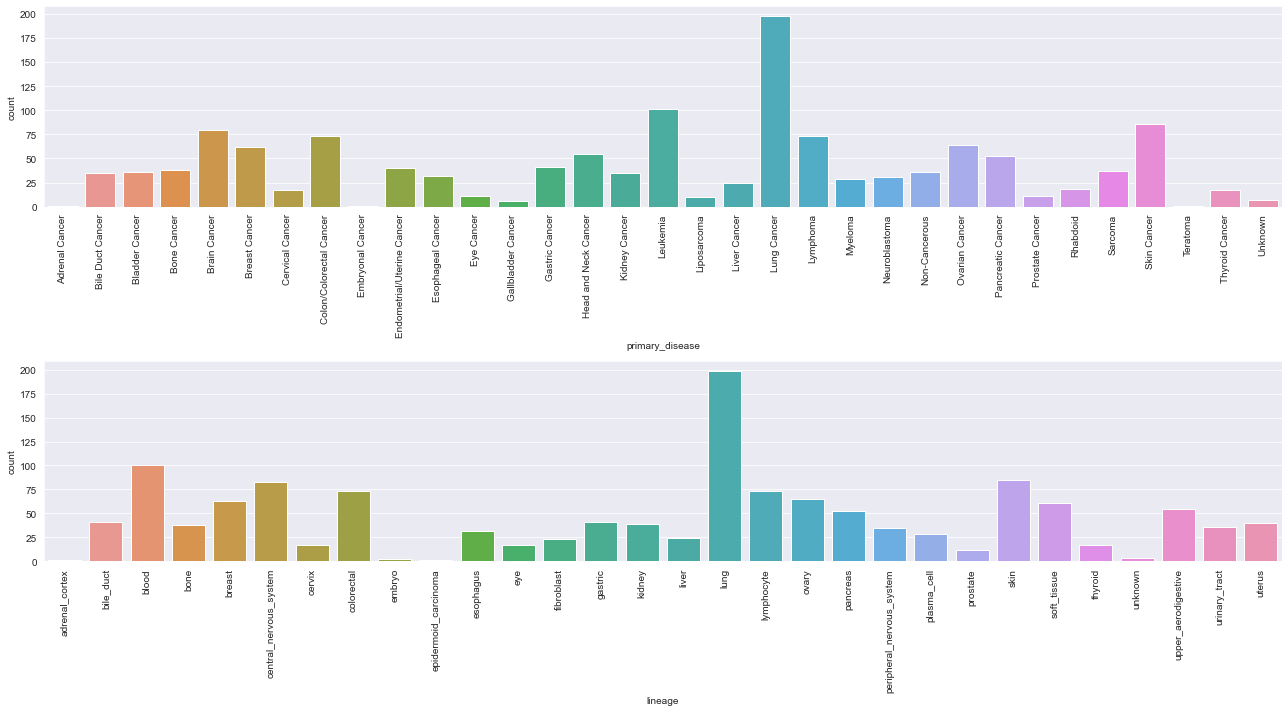

In [6]:
sns.set({'figure.figsize': (18, 10)})
fig, axarr = plt.subplots(2, 1)

sns.barplot(data=ccle_exp_cancer_types, x='primary_disease', y='count', ax=axarr[0])
axarr[0].set_xticklabels(axarr[0].get_xticklabels(), rotation=90)

sns.barplot(data=ccle_exp_tissues, x='lineage', y='count', ax=axarr[1])
axarr[1].set_xticklabels(axarr[1].get_xticklabels(), rotation=90)

plt.tight_layout()